[codebasics](https://www.youtube.com/watch?v=gJo0uNL-5Qw&list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&index=13)

In [1]:
%matplotlib inline

(1797, 64)
(1797, 8, 8)
(1797,)
(10,)



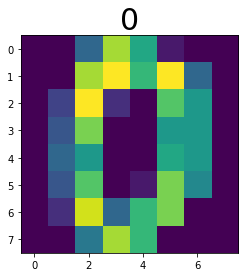

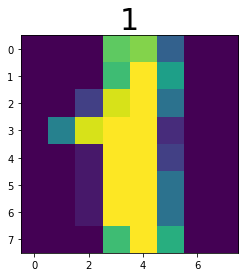

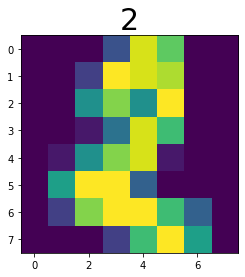

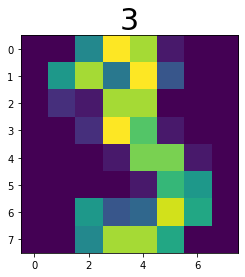

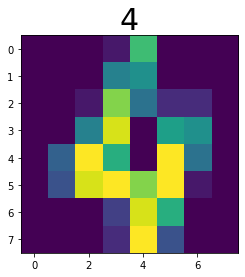

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
2
[0 1 2 3 4 5 6 7 8 9]


In [2]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
# print(type(digits))
# print(dir(digits))
# print()

# print(digits.DESCR)
# print()

# print(type(digits.data))
# print(type(digits.images))
# print(type(digits.target))
# print(type(digits.target_names))
# print()

print(digits.data.shape)
print(digits.images.shape)
print(digits.target.shape)
print(digits.target_names.shape)
print()

# print(type(digits.data[0]))
# print(type(digits.images[0]))
# print(type(digits.target[0]))
# print(type(digits.target_names[0]))
# print()

# print(digits.data[0].shape)
# print(digits.images[0].shape)
# print(digits.target[100])
# print(digits.target_names)

for i in range(5):
    plt.imshow(digits.images[i])
    plt.title(digits.target[i], fontsize=30)
    plt.show()
    
print(digits.data[0])
print(digits.images[0])
print(digits.target[2])
print(digits.target_names)

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(x_train, y_train)
print(lr.score(x_test, y_test))

rf = RandomForestClassifier(n_estimators=40)
rf.fit(x_train, y_train)
print(rf.score(x_test, y_test))

0.9583333333333334
0.9805555555555555


# k-fold cross validation - basic example

In [5]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3)
print(kf)
print()

for train_index, test_index in kf.split([0,1,2,3,4,5,6,7,8]):
    print(train_index, test_index)

KFold(n_splits=3, random_state=None, shuffle=False)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


# k-fold cross validation - manual

In [6]:
def get_score(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    return model.score(x_test, y_test)

In [10]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

kf = StratifiedKFold(n_splits=5)

scores_logistic = []
scores_rf = []

x, y = digits.data, digits.target
for train_index, test_index in kf.split(x, y):
    
    x_train, y_train = x[train_index], y[train_index]
    x_test, y_test = x[test_index], y[test_index]
    
    score = get_score(
        LogisticRegression(solver='liblinear', multi_class='ovr'), 
        x_train, y_train, x_test, y_test)
    scores_logistic.append(score)  
    
    score = get_score(
        RandomForestClassifier(n_estimators=40), 
        x_train, y_train, x_test, y_test) 
    scores_rf.append(score)

# print(scores_logistic)
# print(scores_rf)
print(np.array(scores_logistic).mean())
print(np.array(scores_rf).mean())

0.9210188113360701
0.9360870076047523


# k-fold cross validation - auto

In [14]:
from sklearn.model_selection import cross_val_score

scores_logistic = cross_val_score(
    LogisticRegression(solver='liblinear', multi_class='ovr'), 
    digits.data, 
    digits.target,
    cv=10)

scores_rf = cross_val_score(
    RandomForestClassifier(n_estimators=40),
    digits.data,
    digits.target,
    cv=10)

print(type(scores_logistic))
print(type(scores_rf))
print(scores_logistic.mean())
print(scores_rf.mean())

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
0.9310298346839012
0.9533599539693199


# Parameter tunning using k-fold cross validation

number of trees : 5
score           : 0.8819051951352417

number of trees : 10
score           : 0.9184012105398857

number of trees : 15
score           : 0.9344589033816202

number of trees : 20
score           : 0.9399290941793857

number of trees : 25
score           : 0.9422411465541302

number of trees : 30
score           : 0.946091126051182

number of trees : 35
score           : 0.9548587587078797

number of trees : 40
score           : 0.9516800360415655

number of trees : 45
score           : 0.9521489929454232

number of trees : 50
score           : 0.9494485850877517

number of trees : 55
score           : 0.9499360690146619

number of trees : 60
score           : 0.9505784994874074

number of trees : 65
score           : 0.9550519321959863

number of trees : 70
score           : 0.9538857740942177

number of trees : 75
score           : 0.951133706868734

number of trees : 80
score           : 0.9528133818154034

number of trees : 85
score           : 0.9505636395551986



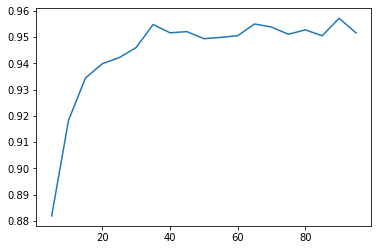

In [15]:
num_trees = []
scores = []
for i in range(5, 100, 5):
    score = cross_val_score(
        RandomForestClassifier(n_estimators=i),
        digits.data, 
        digits.target, 
        cv=10).mean()
    num_trees.append(i)
    scores.append(score)
    print('number of trees :', i)
    print('score           :', score)
    print()
    
plt.plot(num_trees, scores)
plt.show()

Here we used cross_val_score to
fine tune our random forest classifier and figured that having around 40 trees in random forest gives best result. 

<h2 style='color:purple'>Exercise</h2>

Use iris flower dataset from sklearn library and use cross_val_score against following
models to measure the performance of each. In the end figure out the model with best performance,
1. Logistic Regression
2. SVM
3. Decision Tree
4. Random Forest